# Importar Dataset

In [1]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd

In [2]:
boston = load_boston()
boston.keys()

a = boston['data']
b = boston['target']

c = np.column_stack((a,b))

columnas = boston['feature_names']
columnas = np.append(columnas, 'MEDV')

print('El dataset de Boston cuenta con {} filas y {} columnas'.format(c.shape[0], c.shape[1]))

El dataset de Boston cuenta con 506 filas y 14 columnas


In [3]:
boston_df = pd.DataFrame(c, columns = columnas)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Armado de modelos

Como para este dataset ya hicimos la inspeccion visual en el anterior ejemplo, vamos directamente a utilizar la libreria de Statsmodel para verificar relaciones entre mas de una variable.

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
# Ajustamos el modelo con una sóla lína de código agregandole la edad, mediante la función "ols" del paquete "statmodels"
model = smf.ols("MEDV ~ LSTAT + AGE", data=boston_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Wed, 26 Aug 2020   Prob (F-statistic):           2.98e-88
Time:                        15:42:09   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

In [6]:
# como no tenemos un metodo para poder llamar a todas las columnas dentro de la formula, necesitamos creal el string con todos los valores sumados, una forma de hacerlo es la siguiente.

# primero creamos una lista con las columnas, ya que para mas adelante nos va a servir esta metodologia para programar
columnas = [*boston_df.columns] # al poner a boston_df.columns generamos el index del DataFrame, y con los corchetes y el *, hacemos lo que se llama "unpack", en otras palabras lo transformamos en una lista.

# verifiquemos nuestra nueva lista
columnas

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

In [7]:
# debemos remover MEDV ya que es el valor a estimar, para esto utilizaremos una funcion segura para remover un elemento de la lista y a su vez lo imprime para saber cual es
columnas.pop(-1)

'MEDV'

In [8]:
# verifiquemos que el elemento haya sido removido
columnas

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [9]:
# EXCELENTE! ahora tenemos todo para empezar, al momento de manejar strings en python tenemos muchas alternativas, para este caso como 
# solo queremos probar una regresion lineal multiple con todas las variables sumadas, utilizaremos el metodo .join()

all_columns = "+".join(columnas)
formula = 'MEDV ~ ' + all_columns
formula

'MEDV ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT'

In [10]:
# Ajustamos el modelo con una sóla lína de código con todas las variables, utilizando el punto para referenciar a todas las variables.
model = smf.ols(formula, data=boston_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 26 Aug 2020   Prob (F-statistic):          6.72e-135
Time:                        15:42:09   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

Como vimos en la clase pasada, tambien es posible realizar consultas particulares al modelo para obtener los resultados de R2, R2 ajustado, etc.

In [11]:
modelo1_r2_aj = model.rsquared_adj
modelo1_r2_aj

0.733789726372463

Como ya tenemos guardada la formula utilizada en este caso y el valor de R2_ajustado obtenido, iniciaremos un diccionario para almacenar los datos que luego convertiremos en DataFrame para analizarlo.

In [12]:
modelos = {'Formula': [formula], 'R2_ajustado': [modelo1_r2_aj]} # IMPORTANTE: estamos generando una lista dentr de cada campo clave del diccionario, asi de esta manera podremos agregar valores de nuevos modelos
modelos

{'Formula': ['MEDV ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT'],
 'R2_ajustado': [0.733789726372463]}

In [13]:
# que pasa si queremos probar la regresion multiple pero sin un campo
columnas.remove('ZN') # o bien podriamos haber utilizado el metodo .pop() con el index del lugar donde se encuentra el campo que queremos eliminar.

In [14]:
# volvemos a generar el string para poder tener los datos que queremos en la formula
all_columns = "+".join(columnas)
formula = 'MEDV ~ ' + all_columns
formula

'MEDV ~ CRIM+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT'

In [15]:
# creamos el nuevo modelo y verificamos que han cambiado los valores, ya la variable ZN no la tenemos en nuestro modelo
model = smf.ols(formula, data=boston_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.7
Date:                Wed, 26 Aug 2020   Prob (F-statistic):          1.68e-133
Time:                        15:42:09   Log-Likelihood:                -1504.6
No. Observations:                 506   AIC:                             3035.
Df Residuals:                     493   BIC:                             3090.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.8633      5.156      7.150      0.0

In [16]:
# ahora veamos como agregar estos campos al diccionario ya creado.

modelos['Formula'].append(formula)
modelos['R2_ajustado'].append(model.rsquared_adj)

# Interaccion entre terminos

In [17]:
# es facil cambiar el modelo que se quiere utilizar otra formula, simplemente la expresas luego del ~, veamos un ejemplo
# supongamos que queremos armar un modelo que tenga en cuenta la multiplicacion entre LSTAT y AGE.
formula = 'MEDV ~ LSTAT * AGE'
model = smf.ols(formula, data=boston_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 26 Aug 2020   Prob (F-statistic):           4.86e-88
Time:                        15:42:09   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

In [18]:
# agreguemos de nuevo los campos al diccionario.

modelos['Formula'].append(formula)
modelos['R2_ajustado'].append(model.rsquared_adj)
modelos

{'Formula': ['MEDV ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',
  'MEDV ~ CRIM+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',
  'MEDV ~ LSTAT * AGE'],
 'R2_ajustado': [0.733789726372463, 0.7281550008433035, 0.5530715244525772]}

# Transformaciones no lineales a los predictores

In [19]:
# ahora vamos a probar incluir en la formula un predictor elevado a otro orden, es decir, dado un predictor X, podemos crear un predictor X^2
# para hacer esto, es necesario que agreguemos el termino que querramos elevar dentro de: I(...), veamoslo mejor en el ejemplo

formula = 'MEDV ~ LSTAT + I(LSTAT**2)'
model = smf.ols(formula, data = boston_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Wed, 26 Aug 2020   Prob (F-statistic):          1.56e-112
Time:                        15:42:09   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149

In [20]:
# nuevamente lo agregamos al diccionario
modelos['Formula'].append(formula)
modelos['R2_ajustado'].append(model.rsquared_adj)
modelos

{'Formula': ['MEDV ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',
  'MEDV ~ CRIM+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',
  'MEDV ~ LSTAT * AGE',
  'MEDV ~ LSTAT + I(LSTAT**2)'],
 'R2_ajustado': [0.733789726372463,
  0.7281550008433035,
  0.5530715244525772,
  0.6392883361185863]}

# Graficamos

In [21]:
# vamos a graficar el ultimo modelo, por esto necesitamos importar las librerias requeridas para graficar y a su vez, obtener los valores de las pendientes y ordenada del modelo

import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# descomponemos el modelo

b = model.params[0]
m = model.params[1]
k = model.params[2]

Text(0.5, 1.0, 'Regresion cuadratica')

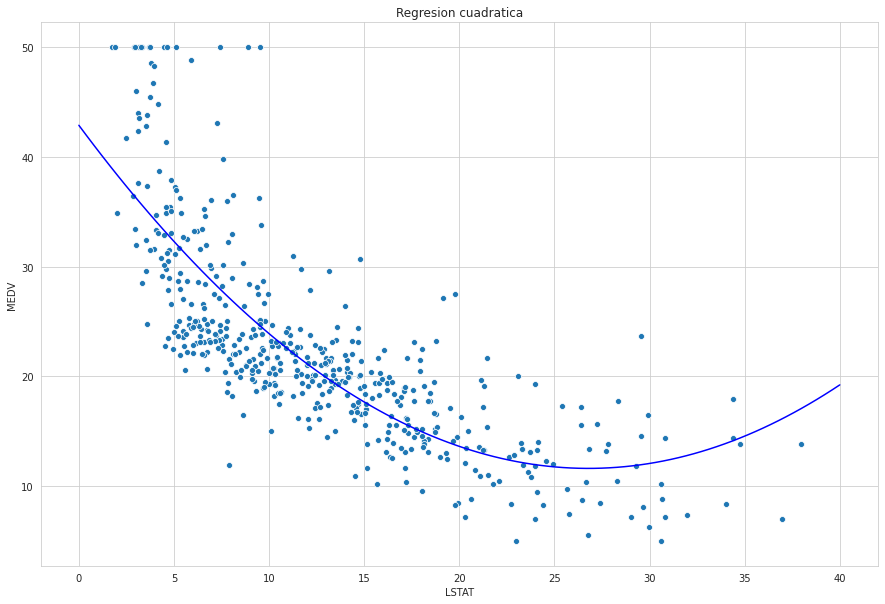

In [23]:
x_recta = np.linspace(0, 40, 100)

#la nueva recta ahora posee un nuevo componente a diferencia del anterior
y_recta = m * x_recta + k * (x_recta ** 2)+ b

sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize = (15,10))
ax.plot(x_recta, y_recta, c = 'b')
sns.scatterplot(x = 'LSTAT',
                y = 'MEDV',
                data = boston_df,
                ax = ax
                )
ax.set_title('Regresion cuadratica')

# Probemos mas grados

In [39]:
# ahora vamos a probar incluir en la formula un predictor elevado a otro orden, es decir, dado un predictor X, podemos crear un predictor X^2
# para hacer esto, es necesario que agreguemos el termino que querramos elevar dentro de: I(...), veamoslo mejor en el ejemplo

formula = 'MEDV ~ LSTAT + I(LSTAT**2) + I(LSTAT**3)'
model = smf.ols(formula, data = boston_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     321.7
Date:                Wed, 26 Aug 2020   Prob (F-statistic):          1.78e-116
Time:                        15:44:58   Log-Likelihood:                -1568.9
No. Observations:                 506   AIC:                             3146.
Df Residuals:                     502   BIC:                             3163.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        48.6496      1.435     33.909

In [25]:
# nuevamente lo agregamos al diccionario
modelos['Formula'].append(formula)
modelos['R2_ajustado'].append(model.rsquared_adj)
modelos

{'Formula': ['MEDV ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',
  'MEDV ~ CRIM+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',
  'MEDV ~ LSTAT * AGE',
  'MEDV ~ LSTAT + I(LSTAT**2)',
  'MEDV ~ LSTAT + I(LSTAT**2) + I(LSTAT**3)'],
 'R2_ajustado': [0.733789726372463,
  0.7281550008433035,
  0.5530715244525772,
  0.6392883361185863,
  0.6558029053739718]}

In [41]:
# IMPORTANTE: en el caso que ya tengamos mas de un coeficiente y querramos ver la prediccion a traves de un DataFrame, existe la posibilidad de 
# utilizar el metodo predict sobre el modelo construido pero es importante que se le asigne un formato de DataFrame acorde al modelo inicial
# haremos un simple ejemplo con 3 datos para ver las predicciones y luego predeciremos el boston completo

prueba = {'LSTAT':[5, 15, 25]}
prueba = pd.DataFrame(prueba)

model.predict(prueba)

0    32.789640
1    17.368838
2    13.660921
dtype: float64

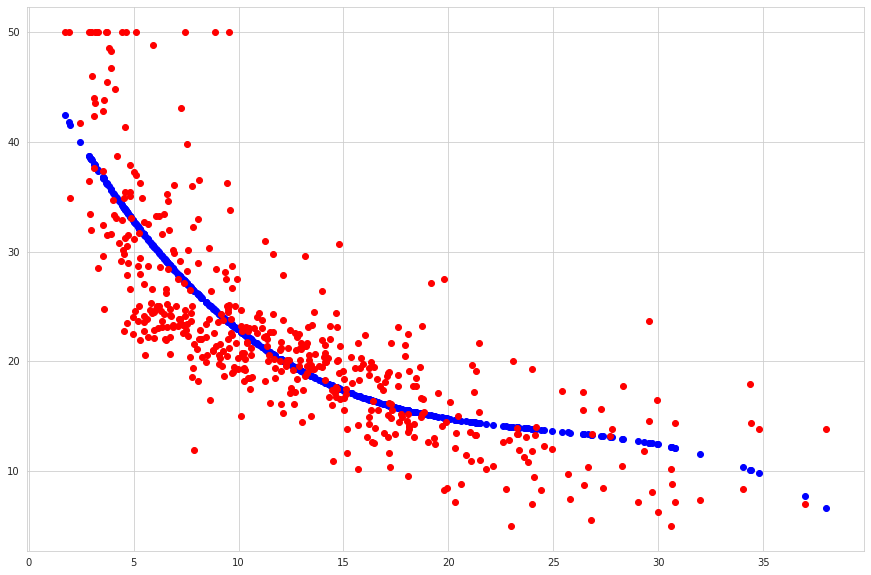

In [27]:
#cargamos las predicciones en la variable medvpred y luego la utilizamos para plotear
medvpred = model.predict(boston_df)

fig, ax = plt.subplots(1, figsize = (15,10))
ax.scatter(boston_df['LSTAT'], medvpred, c = 'b')
ax.scatter(boston_df['LSTAT'], boston_df['MEDV'], c = 'r')
plt.show()

In [28]:
# ahora hagamos una prediccion de un orden superior

formula = 'MEDV ~ LSTAT + I(LSTAT**2) + I(LSTAT**3) + I(LSTAT**4) + I(LSTAT**5) + I(LSTAT**6) + I(LSTAT**7) + I(LSTAT**8) + I(LSTAT**9) + I(LSTAT**10)'
model = smf.ols(formula, data = boston_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     111.0
Date:                Wed, 26 Aug 2020   Prob (F-statistic):           1.95e-97
Time:                        15:42:10   Log-Likelihood:                -1602.4
No. Observations:                 506   AIC:                             3221.
Df Residuals:                     498   BIC:                             3255.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.4319      0.123     27.

In [29]:
# nuevamente lo agregamos al diccionario
modelos['Formula'].append(formula)
modelos['R2_ajustado'].append(model.rsquared_adj)
modelos

{'Formula': ['MEDV ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',
  'MEDV ~ CRIM+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',
  'MEDV ~ LSTAT * AGE',
  'MEDV ~ LSTAT + I(LSTAT**2)',
  'MEDV ~ LSTAT + I(LSTAT**2) + I(LSTAT**3)',
  'MEDV ~ LSTAT + I(LSTAT**2) + I(LSTAT**3) + I(LSTAT**4) + I(LSTAT**5) + I(LSTAT**6) + I(LSTAT**7) + I(LSTAT**8) + I(LSTAT**9) + I(LSTAT**10)'],
 'R2_ajustado': [0.733789726372463,
  0.7281550008433035,
  0.5530715244525772,
  0.6392883361185863,
  0.6558029053739718,
  0.6038866210166582]}

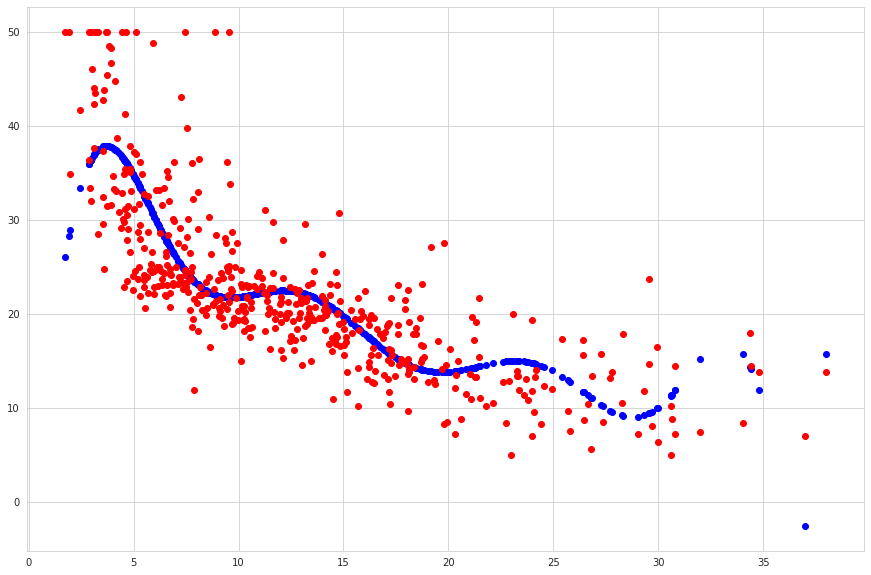

In [30]:
#cargamos las predicciones en la variable medvpred y luego la utilizamos para plotear
medvpred = model.predict(boston_df)

fig, ax = plt.subplots(1, figsize = (15,10))
ax.scatter(boston_df['LSTAT'], medvpred, c = 'b')
ax.scatter(boston_df['LSTAT'], boston_df['MEDV'], c = 'r')
plt.show()

# Regresion polinomial multiple

In [31]:
# lo bueno de este metodo es que no importa el tipo de transformacion que querramos hacer, siempre la notacion es la misma.

formula = 'MEDV ~ LSTAT + I(LSTAT**2) + AGE + I(AGE**2) + I(AGE**3)'

model = smf.ols(formula, data = boston_df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     201.9
Date:                Wed, 26 Aug 2020   Prob (F-statistic):          1.73e-117
Time:                        15:42:11   Log-Likelihood:                -1560.7
No. Observations:                 506   AIC:                             3133.
Df Residuals:                     500   BIC:                             3159.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        40.2786      1.966     20.491

In [32]:
# nuevamente lo agregamos al diccionario
modelos['Formula'].append(formula)
modelos['R2_ajustado'].append(model.rsquared_adj)
modelos

{'Formula': ['MEDV ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',
  'MEDV ~ CRIM+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',
  'MEDV ~ LSTAT * AGE',
  'MEDV ~ LSTAT + I(LSTAT**2)',
  'MEDV ~ LSTAT + I(LSTAT**2) + I(LSTAT**3)',
  'MEDV ~ LSTAT + I(LSTAT**2) + I(LSTAT**3) + I(LSTAT**4) + I(LSTAT**5) + I(LSTAT**6) + I(LSTAT**7) + I(LSTAT**8) + I(LSTAT**9) + I(LSTAT**10)',
  'MEDV ~ LSTAT + I(LSTAT**2) + AGE + I(AGE**2) + I(AGE**3)'],
 'R2_ajustado': [0.733789726372463,
  0.7281550008433035,
  0.5530715244525772,
  0.6392883361185863,
  0.6558029053739718,
  0.6038866210166582,
  0.6654881035750595]}

# Regresion logaritmica

In [33]:
# por supuesto, no estamos de ninguna manera restringidos al uso de transformaciones de los predictores
# Ahora vamos a intentar una transformacion logaritmica

formula = 'MEDV ~ np.log(LSTAT)'

model = smf.ols(formula, data = boston_df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1000.
Date:                Wed, 26 Aug 2020   Prob (F-statistic):          9.28e-122
Time:                        15:42:11   Log-Likelihood:                -1563.6
No. Observations:                 506   AIC:                             3131.
Df Residuals:                     504   BIC:                             3140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        52.1248      0.965     54.004

In [34]:
# nuevamente lo agregamos al diccionario
modelos['Formula'].append(formula)
modelos['R2_ajustado'].append(model.rsquared_adj)
modelos

{'Formula': ['MEDV ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',
  'MEDV ~ CRIM+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',
  'MEDV ~ LSTAT * AGE',
  'MEDV ~ LSTAT + I(LSTAT**2)',
  'MEDV ~ LSTAT + I(LSTAT**2) + I(LSTAT**3)',
  'MEDV ~ LSTAT + I(LSTAT**2) + I(LSTAT**3) + I(LSTAT**4) + I(LSTAT**5) + I(LSTAT**6) + I(LSTAT**7) + I(LSTAT**8) + I(LSTAT**9) + I(LSTAT**10)',
  'MEDV ~ LSTAT + I(LSTAT**2) + AGE + I(AGE**2) + I(AGE**3)',
  'MEDV ~ np.log(LSTAT)'],
 'R2_ajustado': [0.733789726372463,
  0.7281550008433035,
  0.5530715244525772,
  0.6392883361185863,
  0.6558029053739718,
  0.6038866210166582,
  0.6654881035750595,
  0.6642814356429185]}

In [35]:
# y tambien, porque no aplicar una transformacion sobre la variable objetivo

formula = 'np.log(MEDV) ~ LSTAT + I(LSTAT**2) + I(LSTAT**3) + I(LSTAT**4)'

model = smf.ols(formula, data = boston_df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(MEDV)   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     277.9
Date:                Wed, 26 Aug 2020   Prob (F-statistic):          1.14e-125
Time:                        15:42:11   Log-Likelihood:                 30.976
No. Observations:                 506   AIC:                            -51.95
Df Residuals:                     501   BIC:                            -30.82
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.1618      0.099     42.134

In [36]:
# nuevamente lo agregamos al diccionario
modelos['Formula'].append(formula)
modelos['R2_ajustado'].append(model.rsquared_adj)
modelos

{'Formula': ['MEDV ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',
  'MEDV ~ CRIM+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',
  'MEDV ~ LSTAT * AGE',
  'MEDV ~ LSTAT + I(LSTAT**2)',
  'MEDV ~ LSTAT + I(LSTAT**2) + I(LSTAT**3)',
  'MEDV ~ LSTAT + I(LSTAT**2) + I(LSTAT**3) + I(LSTAT**4) + I(LSTAT**5) + I(LSTAT**6) + I(LSTAT**7) + I(LSTAT**8) + I(LSTAT**9) + I(LSTAT**10)',
  'MEDV ~ LSTAT + I(LSTAT**2) + AGE + I(AGE**2) + I(AGE**3)',
  'MEDV ~ np.log(LSTAT)',
  'np.log(MEDV) ~ LSTAT + I(LSTAT**2) + I(LSTAT**3) + I(LSTAT**4)'],
 'R2_ajustado': [0.733789726372463,
  0.7281550008433035,
  0.5530715244525772,
  0.6392883361185863,
  0.6558029053739718,
  0.6038866210166582,
  0.6654881035750595,
  0.6642814356429185,
  0.6868620006385813]}

In [37]:
# Para mejorar la visualizacion de los datos recolectados en el diccionario, transformaremos el mismo en un DataFrame

modelos = pd.DataFrame(modelos)
modelos

,Formula,R2_ajustado
0,MEDV ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+T...,0.733790
1,MEDV ~ CRIM+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+...,0.728155
2,MEDV ~ LSTAT * AGE,0.553072
3,MEDV ~ LSTAT + I(LSTAT**2),0.639288
4,MEDV ~ LSTAT + I(LSTAT**2) + I(LSTAT**3),0.655803
5,MEDV ~ LSTAT + I(LSTAT**2) + I(LSTAT**3) + I(L...,0.603887
6,MEDV ~ LSTAT + I(LSTAT**2) + AGE + I(AGE**2) +...,0.665488
7,MEDV ~ np.log(LSTAT),0.664281
8,np.log(MEDV) ~ LSTAT + I(LSTAT**2) + I(LSTAT**...,0.686862


# ACTIVIDADES:

## - Plotear todos los modelos, de ayuda vamos a citar el codigo que nos servira para el ejercicio.
        medvpred = model.predict(boston_df)

        fig, ax = plt.subplots(1, figsize = (15,10))
        ax.scatter(boston_df['LSTAT'], medvpred, c = 'b')
        ax.scatter(boston_df['LSTAT'], boston_df['MEDV'], c = 'r')
        plt.show()

## - Realizar un script que permita hacer un stepwise o stepfoward para encontrar el modelo con el mayor R2 ajustado.